In [ ]:
# FILTERING ZOOPLA GEN1

columns=['bullet','property_type','start_date','end_date','price_first','price_last','num_bed_last','num_floors_max','num_bathrooms_max','num_receptions_max','pcu','latitude','longitude','duration','lad20cd']
df= df[columns]
df = df.dropna(subset=['lad20cd'])  # Remove rows where 'lad20cd' (local authority didtric) is NaN
df = df[df['lad20cd'].str.startswith('E')]
property_type=["Flat", "Detached house","Semi-detached house","Terraced house","End terrace house","Detached bungalow","Maisonette","Bungalow","Semi-detached bungalow","Town house","Cottage","Studio"]
df = df[df['property_type'].isin(property_type)]


In [ ]:
print(df.dtypes)


bullet                 object
property_type          object
start_date             object
end_date               object
price_first             int64
price_last              int64
num_bed_last            int64
num_floors_max          int64
num_bathrooms_max       int64
num_receptions_max      int64
pcu                    object
latitude              float64
longitude             float64
duration                int64
lad20cd                object
dtype: object


In [ ]:
#One-hot encoding amenties in the bullet_list column
keywords = ['Off street parking', 'Driveway', 'Conservatory', 'Garage', 'Dining Room', 'Swimming pool']

# Loop through the keywords and one hot encode columns with 1 or 0
for keyword in keywords:
    if keyword == 'Off street parking': 
        df['Off street parking'] = df['bullet_list'].apply(
            lambda x: 1 if isinstance(x, str) and ('Off street parking' in x or 'Off road parking' in x) else 0
        )
    else:
        df[keyword] = df['bullet_list'].apply(
            lambda x: 1 if isinstance(x, str) and (keyword in x or keyword.lower() in x.lower()) else 0
        )

df.head()

,bullet_list,num_bedrooms,num_bathrooms,num_recepts,lad22cd,pcu,end_date,price_last,latitude,longitude,...,property_type_Detached house,property_type_Flat,property_type_Maisonette,property_type_Terraced house,Off street parking,Driveway,Conservatory,Garage,Dining Room,Swimming pool
0,"""First Floor Flat""| ""Lounge/dining room""| ""Ful...",2,1,1,E06000049,M446RP,2012-07-18,118995,53.441909,-2.413752,...,0,1,0,0,0,0,0,0,1,0
1,"""Three Bedrooms""| ""Detached Bungalow""| ""Upvc D...",3,1,1,E06000016,LE100XA,2012-09-02,180000,52.546611,-1.387492,...,0,0,0,0,0,0,0,1,0,0
2,"""Forest house| east cliff""| ""Close to the Town...",2,2,1,E06000058,BH13UA,2013-03-19,259950,50.718420,-1.871172,...,0,1,0,0,0,0,0,0,0,0
3,"""3 Bed End Terrace""| ""Overlooking Open Woodlan...",3,1,1,E06000047,DH98AT,2013-02-15,79950,54.874565,-1.704721,...,0,0,0,1,0,0,0,0,1,0
4,"""Link Detached Bungalow""| ""In Private Cul De S...",2,1,1,E06000016,LE100TB,2012-06-08,176995,52.548651,-1.385340,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
#Mapping Travel to Work Areas (TTWA) to Local Authority Districts (LAD)
import pandas as pd
mappings = pd.read_csv("MAP.csv")
c=['LSOA11CD','LAD20CD','LAD20NM']
mappings = mappings[c]

ttw = pd.read_csv("ttwamap.csv")
c=['TTWA11CD','LAD22CD','LAD22NM']
ttw=ttw[c]
print(ttw.shape)
ttw = ttw[ttw['LAD22CD'].str.startswith("E")]
print(ttw.shape)
ttw.to_csv("ttw.csv", index=False)


(188880, 3)
(178605, 3)


/var/folders/8x/7ptf7srj4hv88f_rf699xq9r0000gn/T/ipykernel_5041/229725262.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  ttw = pd.read_csv("ttwamap.csv")


In [ ]:

lad20_not_in_lad22 = set(mappings['LAD20CD']) - set(ttw['LAD22CD'])

# Find LAD22CD values not in LAD20CD
lad22_not_in_lad20 = set(ttw['LAD22CD']) - set(mappings['LAD20CD'])

# Print results
print("LAD20CDs not in LAD22CD:", lad20_not_in_lad22)
print("LAD22CDs not in LAD20CD:", lad22_not_in_lad20)
lad20n_not_in_lad22 = set(mappings['LAD20NM']) - set(ttw['LAD22NM'])

# Find LAD22CD values not in LAD20CD
lad22n_not_in_lad20 = set(ttw['LAD22NM']) - set(mappings['LAD20NM'])

# Print results
print("LAD20CDs not in LAD22CD:", lad20n_not_in_lad22)
print("LAD22CDs not in LAD20CD:", lad22n_not_in_lad20)

LAD20CDs not in LAD22CD: {'E07000155', 'E07000153', 'E07000151', 'E07000150', 'E07000154', 'E07000156', 'E07000152'}
LAD22CDs not in LAD20CD: {'E06000061', 'E06000062'}
LAD20CDs not in LAD22CD: {'Northampton', 'Daventry', 'South Northamptonshire', 'Corby', 'East Northamptonshire', 'Wellingborough', 'Kettering'}
LAD22CDs not in LAD20CD: {'West Northamptonshire', 'North Northamptonshire'}


In [ ]:
import pandas as pd
columns = ['ttwa11cd', 'bullet_list', 'outcode', 'incode', 'price', 'price_change','first_marketed_date', 'last_marketed_date', 'property_type','num_bedrooms', 'num_bathrooms', 'num_recepts']
ttwMap = pd.read_csv('ttw.csv')
ttwMap = ttwMap.drop_duplicates(subset=['TTWA11CD'])
df1_filtered = df1[columns]
df1_filtered = df1_filtered[df1_filtered['ttwa11cd'].str.startswith('E', na=False)]
df1_filtered = df1_filtered.merge(ttwMap[['TTWA11CD','LAD22NM']], left_on ='ttwa11cd', right_on = 'TTWA11CD', how='left')
df1_filtered.drop(columns = ['TTWA11CD', 'ttwa11cd'],inplace=True)
df1_filtered.rename(columns = {'LAD22NM': 'lad22cd'},inplace=True)
df1_filtered['pcu']=df1_filtered['outcode'].astype(str)+df1_filtered['incode'].astype(str)
df1_filtered.drop(columns=['incode', 'outcode'],inplace=True)


,bullet_list,price,price_change,first_marketed_date,last_marketed_date,property_type,num_bedrooms,num_bathrooms,num_recepts,lad22cd,pcu
0,"""First Floor Flat""| ""Lounge/dining room""| ""Ful...",118995,118995,2012-02-01T12:49:35,2012-07-18T03:34:44,Flat,2,0,1,Cheshire East,M446RP
1,"""Three Bedrooms""| ""Detached Bungalow""| ""Upvc D...",180000,180000,2012-04-27T16:18:01,2012-09-02T00:38:50,Detached bungalow,3,1,0,Leicester,LE100XA
2,"""Modern House""| ""Allocated Parking""| ""Good Dec...",339950,339950,2012-02-22T19:48:40,2012-04-23T06:19:11,NaN,3,0,1,Thurrock,NW71HN
3,"""Detached house""| ""Four bedrooms""| ""Gas centra...",220000,220000,2012-02-01T12:49:35,2012-07-18T03:34:44,NaN,4,0,2,Cheshire East,M446EF
4,"""Forest house| east cliff""| ""Close to the Town...",249950,259950|249950,2011-09-27T00:00:00,2013-03-19T18:04:44,Flat,2,2,0,"Bournemouth, Christchurch and Poole",BH13UA


In [ ]:
#GEN2 dataset 
import pandas as pd

# df2 = pd.read_csv("zoopla/zoopla_2017-2022.csv")
lad20_to_lad22_mapping = {
    'E07000155': 'E06000061',
    'E07000153': 'E06000062',
    'E07000151': 'E06000061',
    'E07000150': 'E06000062',
    'E07000154': 'E06000061',
    'E07000156': 'E06000061',
    'E07000152': 'E06000061',
}
# Copy 'lad20nm' column to 'lad22nm'
df2['lad22cd'] = df2['lad20cd']
# Apply mapping for the rows where 'lad20nm' is in the dictionary
df2['lad22cd'] = df2.apply(lambda x: lad20_to_lad22_mapping[x['lad20cd']]
                            if x['lad20cd'] in lad20_to_lad22_mapping else x['lad22cd'], axis=1)
df2.drop(columns=['lad20cd'], inplace=True)


In [ ]:
df2 = pd.read_csv("zoopla/zoopla_2016-2023.csv")

print(df2.head())

,bullet,property_type,start_date,end_date,price_first,price_last,num_bed_last,num_floors_max,num_bathrooms_max,num_receptions_max,pcu,latitude,longitude,duration,lad20cd
0,"[""Communal garden"",""Off street parking"",""Doubl...",Flat,2018-10-01,2019-01-17,273000,273000,1,0,1,1,AL13NN,51.753704,-0.332968,108,E07000240
1,"[""Tenanted"",""En suite"",""Parking"",""Video Entry""...",Terraced house,2018-10-01,2020-03-02,260000,255000,2,0,2,0,AL109QZ,51.764440,-0.239976,518,E07000241
2,"[""Fabulous, secluded location"",""Off-street par...",Bungalow,2018-10-01,2018-11-30,670000,670000,3,0,2,2,AL60UB,51.844845,-0.185226,60,E07000241
3,"[""Front and rear gardens"",""3 reception rooms"",...",Semi-detached house,2018-10-19,2018-11-15,1100000,1100000,4,0,1,3,AL54AF,51.822758,-0.358672,27,E07000240
4,"[""Tenure: Leasehold""]",Flat,2018-10-01,2019-01-07,234000,234000,1,0,0,0,AL97DS,51.733612,-0.218750,98,E07000241


In [ ]:
#Group property types to reduce the number of categories
property_changes = {
    'End terrace house': 'Terraced house',
    'Semi-detached house': 'Detached house',
    'Semi-detached bungalow': 'Detached bungalow'
}
df2['property_type']=df2['property_type'].replace(property_changes)
print(df2['property_type'].value_counts())


property_type
Detached house       3911049
Terraced house       2320909
Flat                 1990406
Detached bungalow     479773
Bungalow              266064
Maisonette            177384
Town house            147878
Cottage                95255
Studio                 53196
Name: count, dtype: int64


In [ ]:
property_type=["Flat","Detached house","Terraced house","Detached bungalow","Maisonette","Bungalow"]
df2= df2[df2['property_type'].isin(property_type)]

In [ ]:

import pandas as pd
df1 = pd.read_csv("zoopla/zoopla_gen1.csv")
df2 = pd.read_csv("zoopla/zoopla_gen2.csv")
# print(df1.columns)
# print(df2.columns)
print(df1.shape)
print(df2.shape)
# print(df1.dtypes)
# print(df2.dtypes)

(3495240, 14)
(9145585, 14)


In [ ]:
#matching columns in gen2 to gen1
df2=df2.rename(columns={
    'bullet': 'bullet_list',
    'num_bed_last': 'num_bedrooms',
    'num_bathrooms_max': 'num_bathrooms',
    'num_receptions_max': 'num_recepts',
})

In [ ]:
zero_counts = df_combined.apply(lambda x: (x == 0).sum())
print(zero_counts)

null_counts = df_combined.isnull().sum()
print(null_counts)


bullet_list           0
property_type         0
num_bedrooms          0
num_bathrooms         0
num_recepts           0
lad22cd               0
pcu                   0
start_date            0
end_date              0
price_first           0
price_last            0
duration         201700
latitude              0
longitude            36
dtype: int64
bullet_list      960410
property_type         0
num_bedrooms          0
num_bathrooms         0
num_recepts           0
lad22cd               0
pcu                   0
start_date            0
end_date              0
price_first           0
price_last            0
duration              0
latitude              0
longitude             0
dtype: int64


In [ ]:
columns_to_check = ['num_bedrooms', 'num_bathrooms', 'num_recepts']
# Calculate mode grouped by property_type
print("\nMode values grouped by property_type:")
print(df_combined.groupby('property_type')[columns_to_check].agg(lambda x: x.mode()[0] if not x.mode().empty else None))




Mode values grouped by property_type:
                   num_bedrooms  num_bathrooms  num_recepts
property_type                                              
Bungalow                      2              1            1
Detached bungalow             2              1            1
Detached house                3              1            2
Flat                          2              1            1
Maisonette                    2              1            1
Terraced house                3              1            1


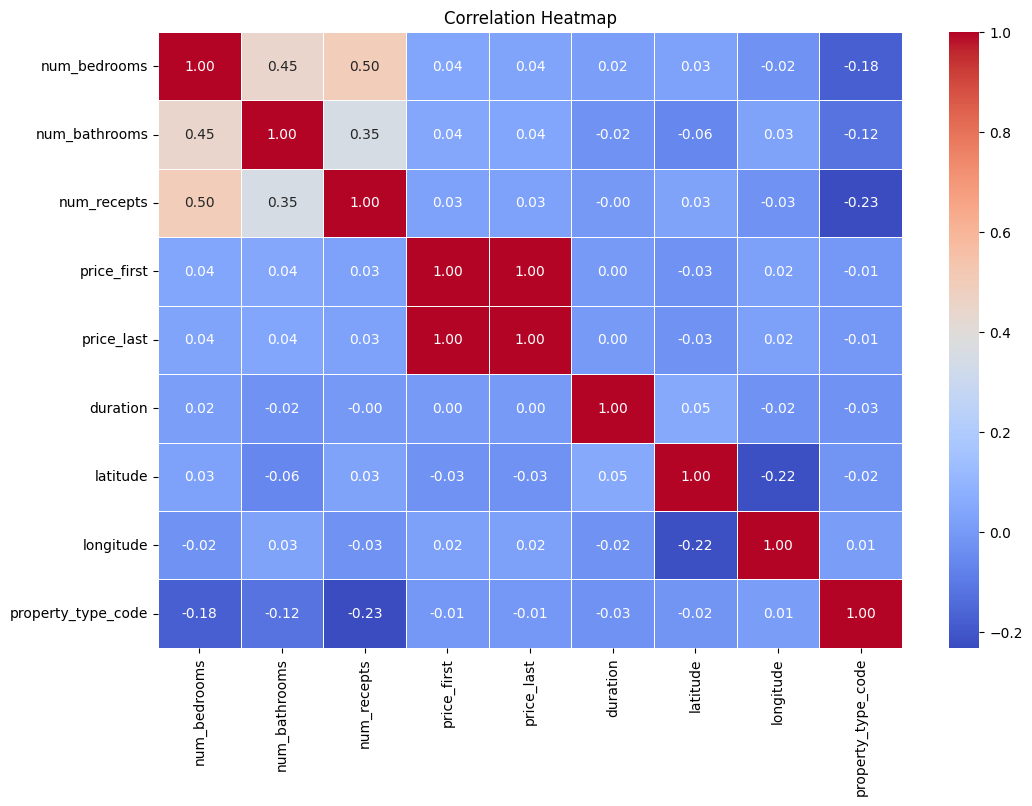

In [ ]:
#Correlation matrix of orginal dataset
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_combined.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


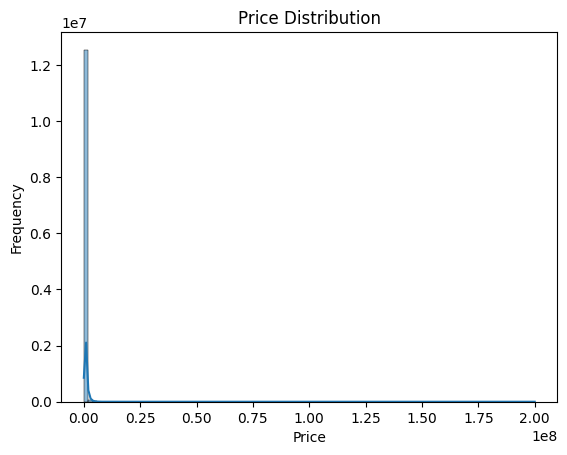

95th Percentile Price: 825000.0
99th Percentile Price: 1750000.0
90th Percentile Price: 625000.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['price_last'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Calculate percentiles
percentile_95 = np.percentile(df['price_last'], 95)
percentile_99 = np.percentile(df['price_last'], 99)
percentile_90 = np.percentile(df['price_last'], 90)


print(f"95th Percentile Price: {percentile_95}")
print(f"99th Percentile Price: {percentile_99}")
print(f"90th Percentile Price: {percentile_90}")



In [ ]:
#Outlier removal and log transformation
import numpy as np
def remove_outliers_and_log_transform(df):
    #outliers based on 99th percentile for 'price
    price_99th_percentile = np.percentile(df['price_last'], 99)
    price_1st_percentile = np.percentile(df['price_last'],1)

    df = df[df['price_last'] <= price_99th_percentile] 
    df = df[df['price_last'] >= price_1st_percentile]  
    
    
    df = df[df['num_bedrooms'] <= 6]  
    df = df[df['num_bathrooms'] <= 4] 
    df = df[df['num_recepts'] <= 4]  
    return df

df = remove_outliers_and_log_transform(df)

print("Data after outlier removal and log transformation:")
print(df.shape)




Data after outlier removal and log transformation:
(12305383, 31)


In [ ]:
# checking number of postocdes
col = 'pcu'
unique_vals = df_cleaned[col].nunique()
print(f"Unique values in '{col}': {unique_vals}")

Unique values in 'pcu': 980813


In [ ]:
#cheching nunber of local authority districts
col = 'lad22cd'
unique_vals = df_cleaned[col].nunique()
print(f"Unique values in '{col}': {unique_vals}")

Unique values in 'lad22cd': 309


In [ ]:
#Target encoding with smoothing for categorical variables postcode and lad22cd
import pandas as pd
def apply_smoothing(df, categorical_col, target_col, smooth_factor):
    overall_mean = df[target_col].mean()
    
    # Calculate the category mean and count for each category
    category_stats = df.groupby(categorical_col).agg(
        category_mean=(target_col, 'mean'),
        category_count=(target_col, 'count')
    )
    
    # Apply smoothing 
    category_stats['smoothed'] = (
        (category_stats['category_count'] * category_stats['category_mean']) + (smooth_factor * overall_mean)
    ) / (category_stats['category_count'] + smooth_factor)
    
    # Merge 
    df = df.merge(category_stats[['smoothed']], how='left', left_on=categorical_col, right_index=True)
    df = df.rename(columns={'smoothed': f'smoothed_{categorical_col}'})
    return df

df_cleanTE = apply_smoothing(df, 'lad22cd', 'price_last', smooth_factor=5)
df_cleanTE= apply_smoothing(df_cleanTE, 'pcu', 'price_last', smooth_factor=5)
df_cleanTE.head()


,num_bedrooms,num_bathrooms,num_recepts,lad22cd,pcu,end_date,price_last,latitude,longitude,property_type_Bungalow,property_type_Detached bungalow,property_type_Detached house,property_type_Flat,property_type_Maisonette,property_type_Terraced house,Off street parking,Driveway,Conservatory,Garage,Dining Room,Swimming pool,postcode,lsoa11cd,geo_code,gp_practices_30,hospitals_30,primary_schools_30,secondary_schools_30,supermarkets_30,nearest_parks,nearest_main_bua,smoothed_lad22cd,smoothed_pcu
2,2,2,1,E06000058,BH13UA,2013-03-19,259950,50.718420,-1.871172,0,0,0,1,0,0,0,0,0,0,0,0,BH13UA,E01015285,E01015285,12.0,5.0,16.0,4.0,14.0,0.0,18.0,336429.769085,309932.800791
3,3,1,1,E06000047,DH98AT,2013-02-15,79950,54.874565,-1.704721,0,0,0,0,0,1,0,0,0,0,1,0,DH98AT,E01020678,E01020678,2.0,0.0,5.0,1.0,2.0,20.0,77.0,152723.674529,157772.694283
15,4,1,4,E06000047,TS213NX,2013-03-11,269000,54.664597,-1.452037,0,0,1,0,0,0,0,0,0,1,1,0,TS213NX,E01020829,E01020829,1.0,1.0,5.0,1.0,2.0,0.0,55.0,152723.674529,312292.551781
16,3,2,1,E06000047,NE258RE,2014-04-11,229950,55.037667,-1.445003,0,0,0,1,0,0,0,0,0,1,0,0,NE258RE,E01008589,E01008589,13.0,1.0,22.0,4.0,11.0,0.0,42.0,152723.674529,309365.046027
18,3,1,2,E06000010,HU120PN,2013-03-06,133500,53.682554,-0.017065,0,0,1,0,0,0,0,0,0,0,0,0,HU120PN,E01013086,E01013086,0.0,0.0,0.0,0.0,0.0,43.0,109.0,138437.329658,304092.551781


In [ ]:
#creating mapping table for postcode and lad22cd to smoothed target encoded values
smooth = df_cleanTE[['pcu','smoothed_pcu', 'smoothed_lad22cd']]
df_unique_pcu = smooth.drop_duplicates(subset='pcu', keep='first')
df_unique_pcu.to_csv("../zoopla/smooth_mappings.csv", index=False)
# smooth.to_csv("zoopla/smooth.csv", index=False)

In [ ]:
#Merging property listings dataset to accessibility indicators dataset
# AI = pd.read_csv("../AI23/ptAI.csv") 
df = new_df.merge(AI[['geo_code','gp_practices_30','hospitals_30','primary_schools_30','secondary_schools_30','supermarkets_30','nearest_parks','nearest_main_bua']], left_on='lsoa11cd', right_on='geo_code', how='left')  

In [ ]:
df.drop(columns = ['geo_code','pcu','lad22cd','lsoa11cd'], inplace=True)
df.columns

Index(['num_bedrooms', 'num_bathrooms', 'num_recepts', 'end_date',
       'price_last', 'latitude', 'longitude', 'property_type_Bungalow',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_Flat', 'property_type_Maisonette',
       'property_type_Terraced house', 'Off street parking', 'Driveway',
       'Conservatory', 'Garage', 'Dining Room', 'Swimming pool',
       'smoothed_lad22cd', 'smoothed_pcu', 'gp_practices_30', 'hospitals_30',
       'primary_schools_30', 'secondary_schools_30', 'supermarkets_30',
       'nearest_parks', 'nearest_main_bua'],
      dtype='object')

In [ ]:
df.skew()


,num_bedrooms,num_bathrooms,num_recepts,end_date,price_last,latitude,longitude,property_type_Bungalow,property_type_Detached bungalow,property_type_Detached house,property_type_Flat,property_type_Maisonette,property_type_Terraced house,Off street parking,Driveway,Conservatory,Garage,Dining Room,Swimming pool,gp_practices_30,hospitals_30,primary_schools_30,secondary_schools_30,supermarkets_30,nearest_parks,nearest_main_bua
count,9.642163e+06,9.642163e+06,9.642163e+06,9642163,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06,9.642163e+06
mean,2.833333e+00,1.288176e+00,1.523277e+00,2018-11-10 10:22:45.800183552,3.198681e+05,5.224075e+01,-1.127676e+00,3.197322e-02,5.620108e-02,4.328012e-01,2.040618e-01,1.928665e-02,2.556760e-01,4.466083e-02,1.202910e-01,7.134333e-02,2.545026e-01,1.063250e-01,2.935545e-03,9.259967e+00,1.521440e+00,1.493546e+01,3.282192e+00,5.812328e+00,1.141079e+01,5.466673e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,5.200000e+04,4.991394e+01,-6.354109e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,2017-01-26 00:00:00,1.649500e+05,5.142467e+01,-2.040272e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,3.600000e+01
50%,3.000000e+00,1.000000e+00,1.000000e+00,2019-03-01 00:00:00,2.550000e+05,5.188482e+01,-1.119881e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,9.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,5.200000e+01
75%,3.000000e+00,1.000000e+00,2.000000e+00,2020-12-17 00:00:00,4.000000e+05,5.320663e+01,-1.678220e-01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.000000e+00,1.700000e+01,4.000000e+00,7.000000e+00,1.500000e+01,7.000000e+01
max,6.000000e+00,4.000000e+00,4.000000e+00,2023-03-31 00:00:00,1.750000e+06,5.580061e+01,1.758154e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.180000e+02,4.300000e+01,2.890000e+02,6.900000e+01,9.100000e+01,1.510000e+02,1.510000e+02
std,1.005471e+00,5.673464e-01,6.492935e-01,NaN,2.337242e+05,1.122459e+00,1.266255e+00,1.759288e-01,2.303096e-01,4.954638e-01,4.030144e-01,1.375306e-01,4.362406e-01,2.065581e-01,3.253015e-01,2.573975e-01,4.355813e-01,3.082532e-01,5.410109e-02,1.639756e+01,3.466404e+00,2.114461e+01,5.228121e+00,6.844325e+00,1.599602e+01,2.612592e+01


In [ ]:
#adding numeric date timestamp column
df_cleanTE['end_date_numeric'] = df_cleanTE['end_date'].astype('int64') // 10**9
df_cleanTE.drop(columns = ['end_date'], inplace=True)
df_cleanTE.head()

,num_bedrooms,num_bathrooms,num_recepts,lad22cd,pcu,price_last,latitude,longitude,property_type_Bungalow,property_type_Detached bungalow,property_type_Detached house,property_type_Flat,property_type_Maisonette,property_type_Terraced house,Off street parking,Driveway,Conservatory,Garage,Dining Room,Swimming pool,postcode,lsoa11cd,geo_code,gp_practices_30,hospitals_30,primary_schools_30,secondary_schools_30,supermarkets_30,nearest_parks,nearest_main_bua,smoothed_lad22cd,smoothed_pcu,end_date_numeric
2,2,2,1,E06000058,BH13UA,259950,50.718420,-1.871172,0,0,0,1,0,0,0,0,0,0,0,0,BH13UA,E01015285,E01015285,12.0,5.0,16.0,4.0,14.0,0.0,18.0,336429.769085,309932.800791,1363651200
3,3,1,1,E06000047,DH98AT,79950,54.874565,-1.704721,0,0,0,0,0,1,0,0,0,0,1,0,DH98AT,E01020678,E01020678,2.0,0.0,5.0,1.0,2.0,20.0,77.0,152723.674529,157772.694283,1360886400
15,4,1,4,E06000047,TS213NX,269000,54.664597,-1.452037,0,0,1,0,0,0,0,0,0,1,1,0,TS213NX,E01020829,E01020829,1.0,1.0,5.0,1.0,2.0,0.0,55.0,152723.674529,312292.551781,1362960000
16,3,2,1,E06000047,NE258RE,229950,55.037667,-1.445003,0,0,0,1,0,0,0,0,0,1,0,0,NE258RE,E01008589,E01008589,13.0,1.0,22.0,4.0,11.0,0.0,42.0,152723.674529,309365.046027,1397174400
18,3,1,2,E06000010,HU120PN,133500,53.682554,-0.017065,0,0,1,0,0,0,0,0,0,0,0,0,HU120PN,E01013086,E01013086,0.0,0.0,0.0,0.0,0.0,43.0,109.0,138437.329658,304092.551781,1362528000


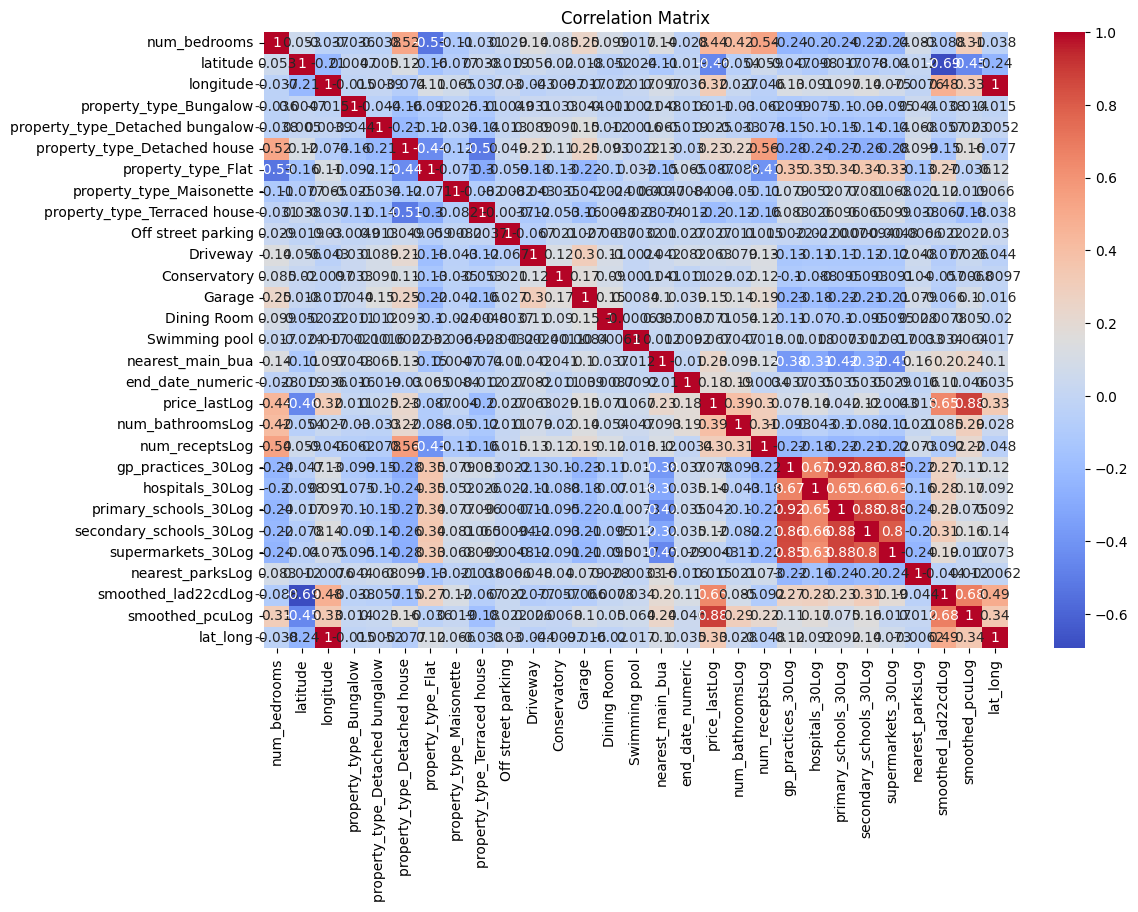

In [ ]:
#Correlation Matrix of dataset with accessibility indicators
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleanTE.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
